In [1]:
# Import the required library:

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the Dataset:

filepath = 'C:/Users/Peter Mondal/Desktop/Machine Learning/Machine Learning Project/ML case Study.csv'
df = pd.read_csv(filepath, header = 0)
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


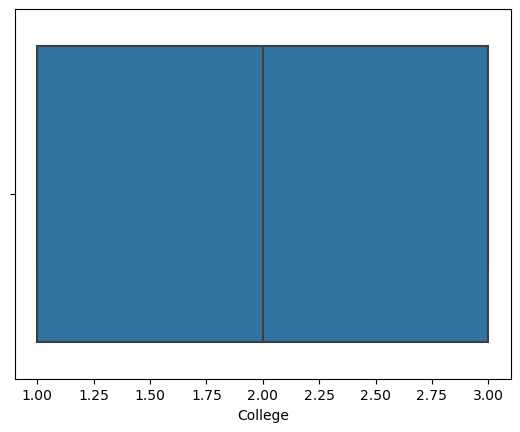

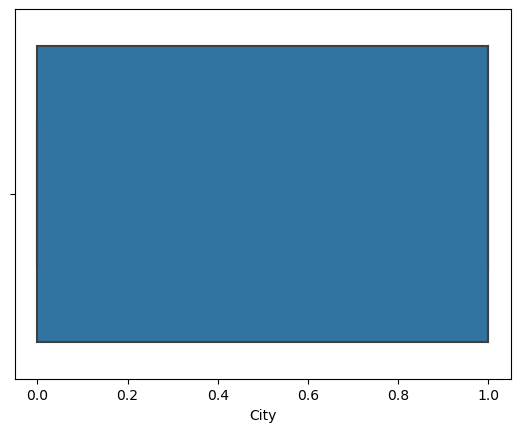

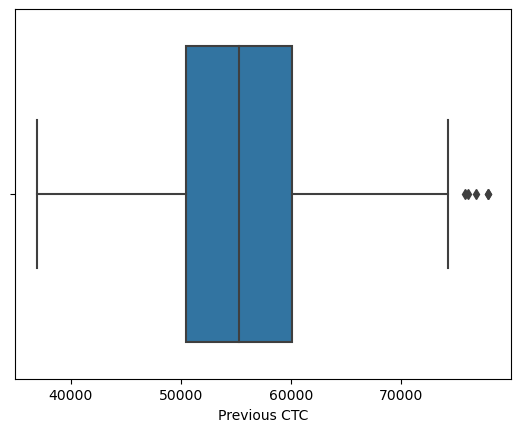

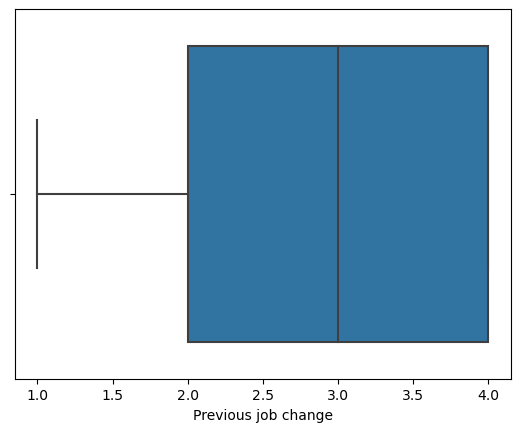

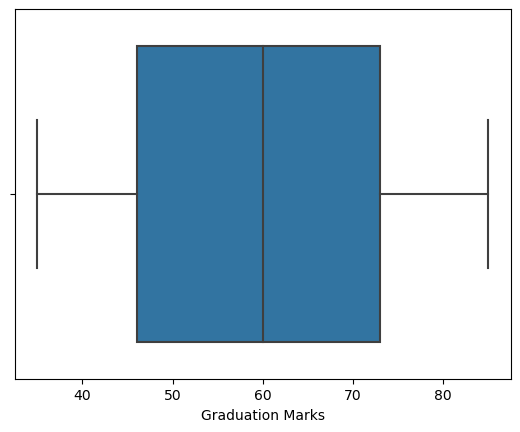

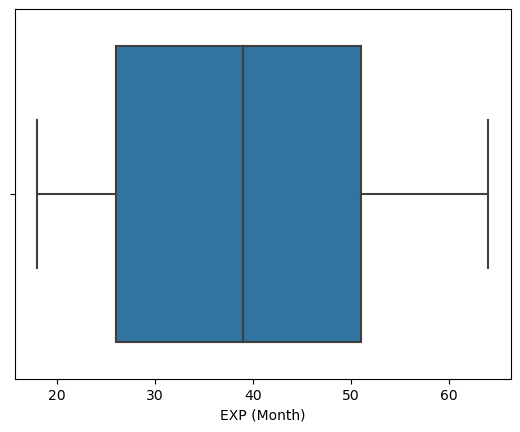

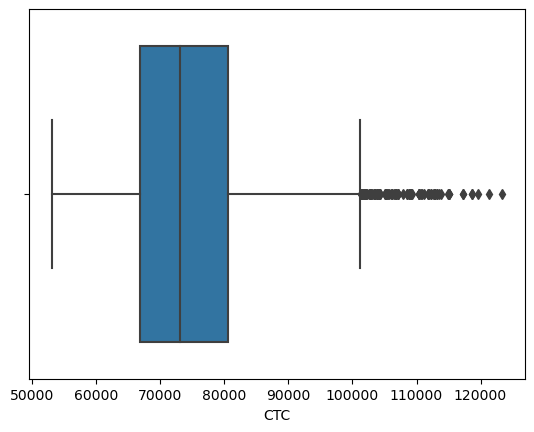

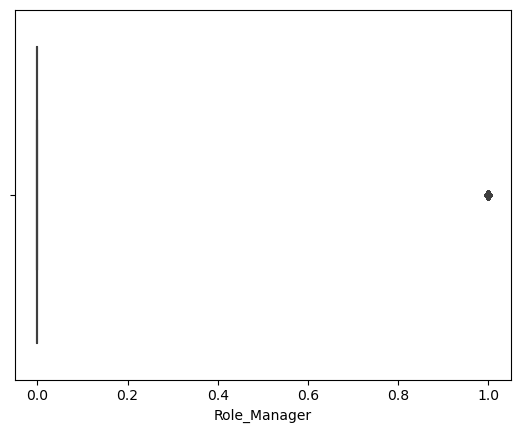

In [45]:
# Check for outliers:
import matplotlib.pyplot as plt # Import the matplotlib library
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()
    
    
# We will not remove the outliers for this kind of data, since this will affect the output of the model. The outliers in this data are close to the 75 percentile range and does not cause much problem.(Monetary dataset - we usually don't remove the outlier)

#Remove the Outliers in the Dataset by IQR Method:

# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.4 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
import matplotlib.pyplot as plt # Import the matplotlib library
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [4]:
# Load the College Dataset, so that we can can use them to divide the college column in the actual dataset into Tier 1, 2, 3 Colleges:

filepath1 = 'C:/Users/Peter Mondal/Desktop/Machine Learning/Machine Learning Project/Colleges.csv'
college = pd.read_csv(filepath1, header = 0)
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
# Load the Cities Dataset, so that we can can use them to divide the city column in actual dataset into Metro and Non-Metro Cities:

filepath2 = 'C:/Users/Peter Mondal/Desktop/Machine Learning/Machine Learning Project/cities.csv'
cities = pd.read_csv(filepath2, header = 0)
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
#Using dataframe data: check missing values

cities.isna().sum()

Metrio City         0
non-metro cities    1
dtype: int64

In [7]:
# Convert the data into list:

Metro_city = cities["Metrio City"].tolist()
Non_Metro_city = cities["non-metro cities"].tolist()

In [8]:
# Replace the Non-Metro City with 1 and Metro City with 0 as values:
for item in df.City:
    if item in Metro_city:
        df["City"].replace(item, 1, inplace = True)
    elif item in Non_Metro_city:
        df["City"].replace(item, 0, inplace = True)        

In [9]:
# Convert the data into list:

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [10]:
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [11]:
#Using dataframe data: check missing values

college.isna().sum()

Tier 1    6
Tier 2    0
Tier 3    9
dtype: int64

In [12]:
# Drop data in college with null values:

college = college.dropna()

In [13]:
#Using dataframe data: check missing values:

college.isna().sum()

Tier 1    0
Tier 2    0
Tier 3    0
dtype: int64

In [14]:
#Using dataframe data: check missing values:
df.isna().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [15]:
# Replace the Tier1 College with 1, Tier2 College with 2 and Tier3 College with 3 as values:

for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1, inplace = True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace = True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace = True)
        

In [16]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [17]:
# Create dummy variables for all required field:

df= pd.get_dummies(df, columns =["Role"], drop_first=True).astype(int)

# Display the first few lines to see the changes in dataframe:

df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406,1
1,2,0,57081,1,84,18,68005,0
2,3,0,60347,2,52,28,76764,0
3,3,0,49010,2,81,33,82092,0
4,1,0,57879,4,74,32,73878,0


In [18]:
#use describe function

# Get descriptive statistics for numerical columns
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75352.790434,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.293679,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.000000,1.000000


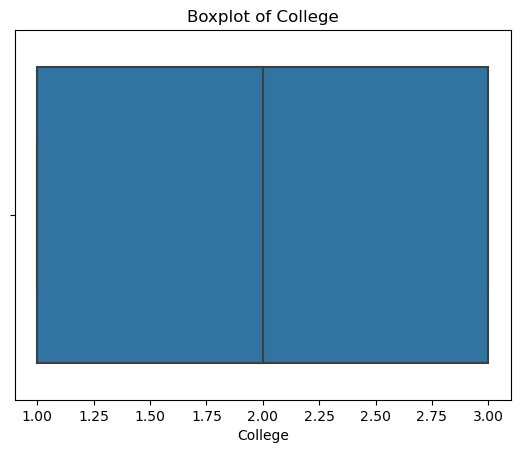

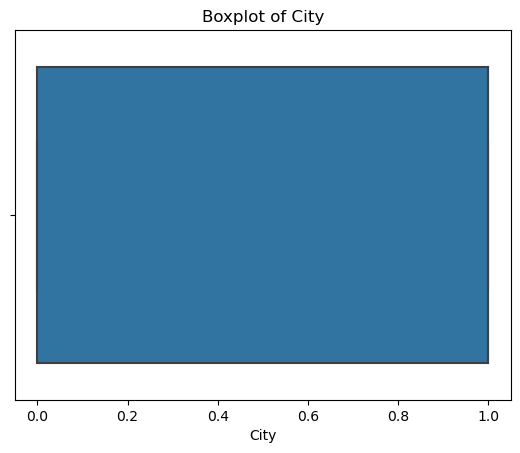

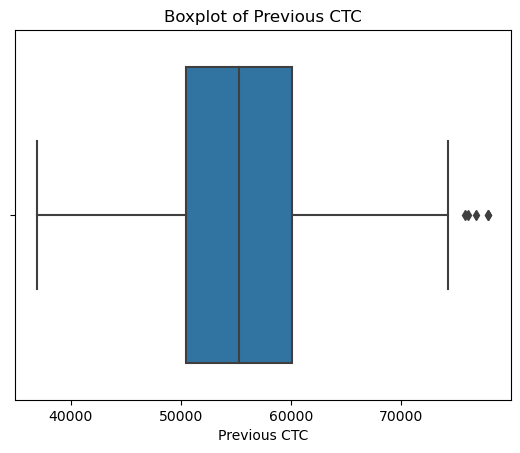

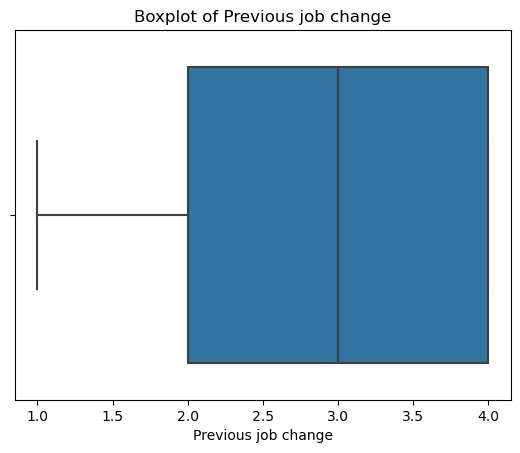

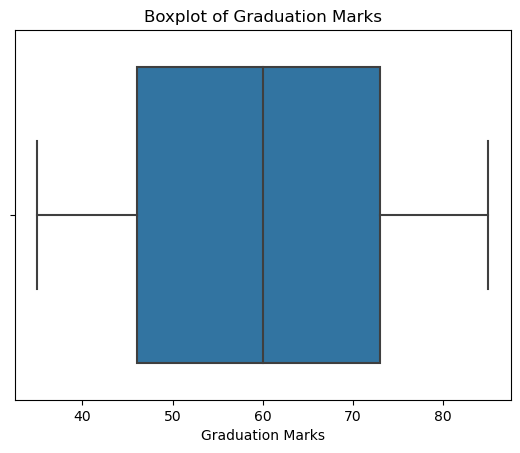

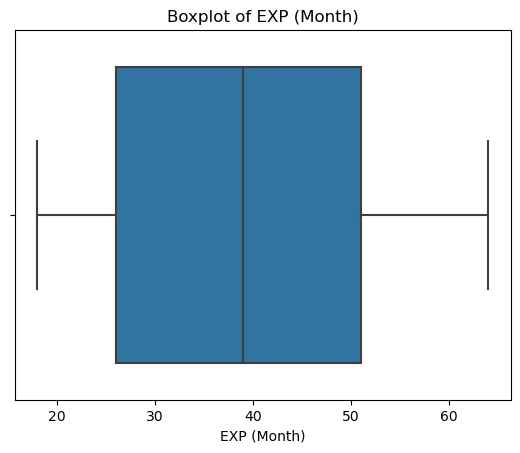

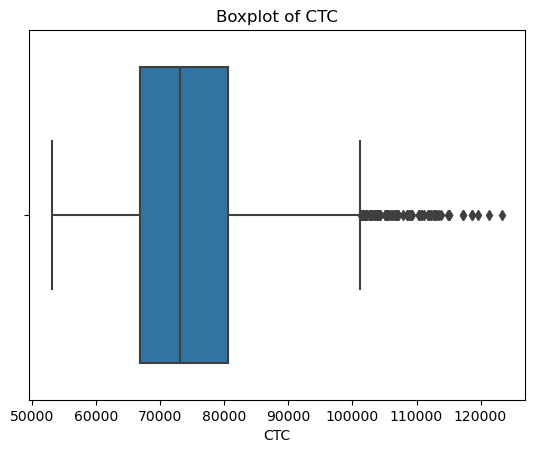

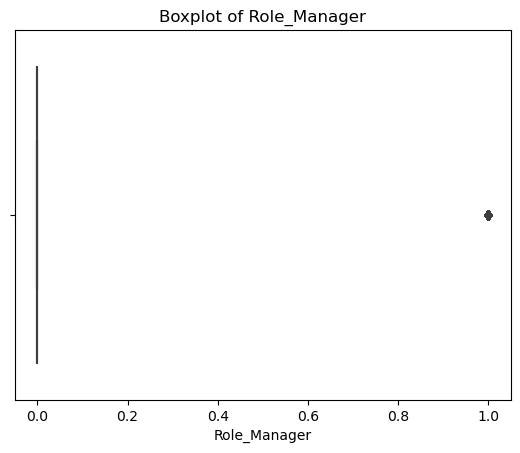

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library

# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


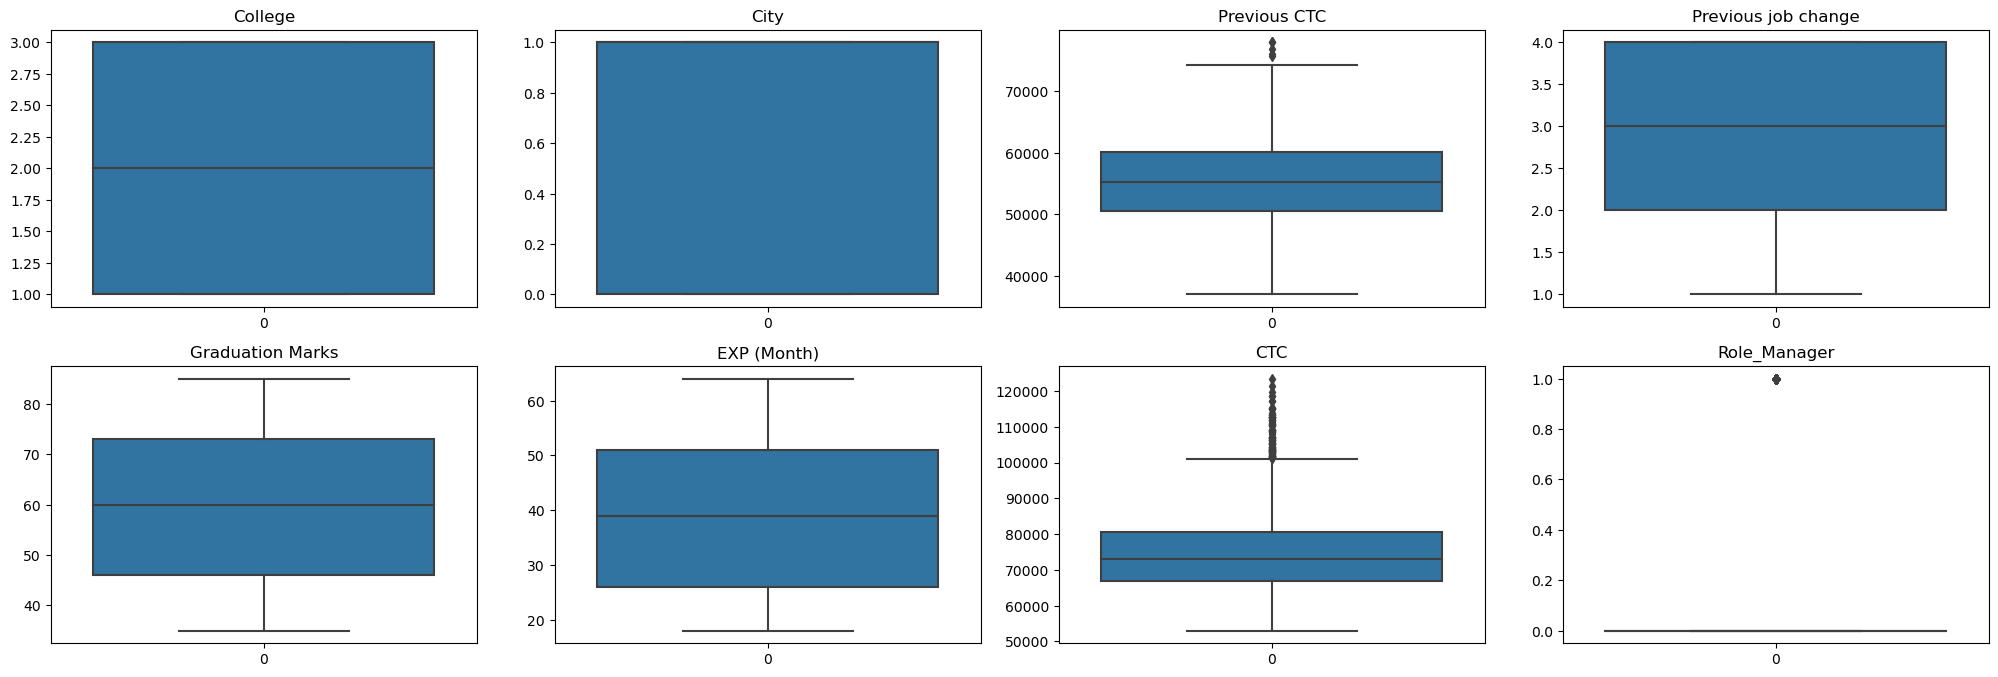

In [20]:
import matplotlib.pyplot as plt

# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [21]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406,1
1,2,0,57081,1,84,18,68005,0
2,3,0,60347,2,52,28,76764,0
3,3,0,49010,2,81,33,82092,0
4,1,0,57879,4,74,32,73878,0


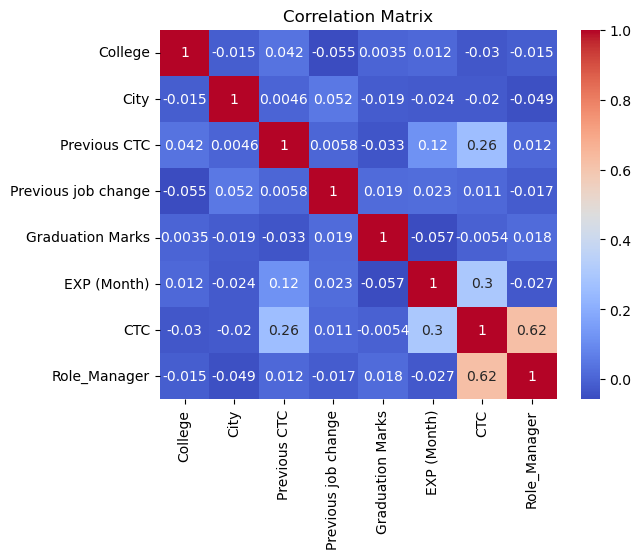

In [22]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int32
 1   City                 1589 non-null   int32
 2   Previous CTC         1589 non-null   int32
 3   Previous job change  1589 non-null   int32
 4   Graduation Marks     1589 non-null   int32
 5   EXP (Month)          1589 non-null   int32
 6   CTC                  1589 non-null   int32
 7   Role_Manager         1589 non-null   int32
dtypes: int32(8)
memory usage: 49.8 KB


# Linear Regression:

In [24]:
import statsmodels.api as sm

# Define the target variable (y) and features (X)
X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_const).fit()

# Display the summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 23 Aug 2024   Prob (F-statistic):          4.71e-257
Time:                        18:27:29   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.663     17.522      0.000    3.41e+04    4.27e+04
College              -481.5171    258.382     -1.864      0.063    -988.324      25.290
City                  380.8471    433.456      0.879      0.380    -469.362    1231.056
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5629    192.887      0.656      0.512    -251.779     504.905
Graduation Marks        6.2366     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3459     15.460     16.904      0.000     231.021     291.671
Role_Manager         1.949e+04    534.695     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.300
Skew:                           0.408   Prob(JB):                     9.81e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the independent variable (X) and dependent variable (y)
X_simple = df[['Previous CTC']]  # Using 'alcohol' as the predictor
y_simple = df['CTC']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create a simple linear regression model
model_simple = LinearRegression()

# Train the model
model_simple.fit(X_train, y_train)

# Predict the 'quality' on the test set
y_pred = model_simple.predict(X_test)

y_pred_train = model_simple.predict(X_train)

# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

r_squared_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)


print(f"R-squared for training set: {r_squared_train}")
print(f"Mean Squared Error for training set: {mse_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")


R-squared for training set: 0.07345165629971806
Mean Squared Error for training set: 139292028.42208904
R-squared for test set: 0.044160754208761865
Mean Squared Error for test set: 181843825.11391017


In [26]:
# Define the independent variables (X) and dependent variable (y)
X = df.drop('CTC', axis=1)  # Features
y = df['CTC']  # Target variable

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.2, random_state=42)

# Create a multiple linear regression model
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

# Predict the 'quality' on the test set
y_pred_test = model_multiple.predict(X_test)

y_pred_train = model_multiple.predict(X_train)

# Calculate R-squared and Mean Squared Error (MSE) for the model
r_squared_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

r_squared_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"R-squared for training set: {r_squared_train}")
print(f"Mean Squared Error for training set: {mse_train}")
print(f"R-squared for test set: {r_squared_test}")
print(f"Mean Squared Error for test set: {mse_test}")


R-squared for training set: 0.5137734046204612
Mean Squared Error for training set: 73096551.52229236
R-squared for test set: 0.5933515097281491
Mean Squared Error for test set: 77362921.92796244


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Create a Ridge regression model within a pipeline that includes scaling
ridge_model = make_pipeline(StandardScaler(), Ridge(random_state=42))

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Predict the 'quality' on both the training and test sets using the Ridge model
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared for both the training and test sets for the Ridge model
r_squared_train_ridge = r2_score(y_train, y_train_pred_ridge)
r_squared_test_ridge = r2_score(y_test, y_test_pred_ridge)

r_squared_train_ridge, r_squared_test_ridge



(0.513773094888196, 0.5932147354587054)

In [28]:
from sklearn.linear_model import RidgeCV

# Define a range of alpha values to explore
alphas = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

# Create a RidgeCV regression model with specified alpha values and built-in cross-validation
# Using the same standard scaler for fair comparison
ridge_cv_model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))

# Train the RidgeCV model
ridge_cv_model.fit(X_train, y_train)

# Extract the optimal alpha value after fitting
optimal_alpha = ridge_cv_model.named_steps['ridgecv'].alpha_

optimal_alpha

7

In [29]:
# Now that we have the optimal alpha, let's train a Ridge regression model using this specific alpha value
# and evaluate its performance

# Create a Ridge regression model with the optimal alpha, including scaling
ridge_optimal_model = make_pipeline(StandardScaler(), Ridge(alpha=optimal_alpha, random_state=42))

# Train the model with the optimal alpha
ridge_optimal_model.fit(X_train, y_train)

# Predict the 'quality' on both the training and test sets using the optimal Ridge model
y_train_pred_optimal_ridge = ridge_optimal_model.predict(X_train)
y_test_pred_optimal_ridge = ridge_optimal_model.predict(X_test)

# Calculate R-squared for both the training and test sets for the optimal Ridge model
r_squared_train_optimal_ridge = r2_score(y_train, y_train_pred_optimal_ridge)
r_squared_test_optimal_ridge = r2_score(y_test, y_test_pred_optimal_ridge)

r_squared_train_optimal_ridge, r_squared_test_optimal_ridge


(0.5137583699404416, 0.5923878501612954)

In [30]:
from sklearn.linear_model import LassoCV

# Define a range of alpha values for the LassoCV to explore
alphas_lasso = [0.001, 0.01, 0.1, 1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,141,142,143,144,145,146,147,148,149,150]

# Create a LassoCV regression model with specified alpha values and built-in cross-validation
# Using the same standard scaler for fair comparison
lasso_cv_model = make_pipeline(StandardScaler(), LassoCV(alphas=alphas_lasso, random_state=42, cv=5))

# Train the LassoCV model
lasso_cv_model.fit(X_train, y_train)

# Extract the optimal alpha value after fitting
optimal_alpha_lasso = lasso_cv_model.named_steps['lassocv'].alpha_

# Predict the 'quality' on both the training and test sets using the optimal Lasso model
y_train_pred_optimal_lasso = lasso_cv_model.predict(X_train)
y_test_pred_optimal_lasso = lasso_cv_model.predict(X_test)

# Calculate R-squared for both the training and test sets for the optimal Lasso model
r_squared_train_optimal_lasso = r2_score(y_train, y_train_pred_optimal_lasso)
r_squared_test_optimal_lasso = r2_score(y_test, y_test_pred_optimal_lasso)

optimal_alpha_lasso, r_squared_train_optimal_lasso, r_squared_test_optimal_lasso


(130.0, 0.5131941621792535, 0.5894956464714443)

In [31]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Building a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_regressor.fit(X_train, y_train)

# Exporting the decision tree to a DOT format
dot_data = export_graphviz(dt_regressor, out_file=None,
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to visualize the tree
tree_graph = graphviz.Source(dot_data)

tree_graph

from sklearn.metrics import r2_score

# Predicting the values for both training and test datasets
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Calculating the R² scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print(f"R² score for training dataset: {r2_score_train}")
print(f"R² score for test dataset: {r2_score_test}")

R² score for training dataset: 0.6062943355764511
R² score for test dataset: 0.5949134132218526


# Decision Tree & Ensemble Technique:


In [32]:
# To find the feature with the highest correlation with CTC, we'll calculate the correlation matrix
correlation_matrix = df.corr()

# Extracting the 'CTC' column to find its correlations with other features
CTC_correlations = correlation_matrix['CTC'].drop('CTC')  # Exclude self-correlation

# Finding the feature with the highest correlation with CTC
most_correlated_feature = CTC_correlations.idxmax()
highest_correlation = CTC_correlations.max()

most_correlated_feature, highest_correlation

('Role_Manager', 0.6213102013055686)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting features and target variable
X = df.drop('CTC', axis=1)  # Use all features except 'CTC' for prediction
y = df['CTC']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R^2 scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

r2_score_train, r2_score_test



(0.5137734046204612, 0.5933515097281492)

In [34]:
from sklearn import preprocessing
from sklearn.linear_model import Lasso

# Create a Lasso regression model with an alpha parameter of 0.01
lasso_model = Lasso(alpha=0.01)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate R^2 scores
r2_score_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print R^2 scores
print("R^2 score for training set (Lasso):", r2_score_train_lasso)
print("R^2 score for testing set (Lasso):", r2_score_test_lasso)


R^2 score for training set (Lasso): 0.5137734046118989
R^2 score for testing set (Lasso): 0.5933510234452344


In [35]:
from sklearn.linear_model import Ridge

# Standardize the data
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a Ridge regression model with an alpha parameter of 0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model to the training data
ridge_model.fit(X_train_std, y_train)

# Predict on training and testing sets
y_train_pred_ridge = ridge_model.predict(X_train_std)
y_test_pred_ridge = ridge_model.predict(X_test_std)

# Calculate R^2 scores
r2_score_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_score_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print R^2 scores
print("R^2 score for training set (Ridge):", r2_score_train_ridge)
print("R^2 score for testing set (Ridge):", r2_score_test_ridge)


R^2 score for training set (Ridge): 0.5137734015187496
R^2 score for testing set (Ridge): 0.5933378458719878


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import graphviz
from sklearn import tree

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_test = dt_regressor.predict(X_test)
y_pred_train = dt_regressor.predict(X_train)

# Evaluate the model with R² score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("R^2 score for training set (Decision Tree):", r2_train)
print("R^2 score for testing set (Decision Tree):", r2_test)

R^2 score for training set (Decision Tree): 1.0
R^2 score for testing set (Decision Tree): 0.3193525085275256


In [37]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Initialize the Decision Tree Regressor with max_depth set to 5
dt_regressor_tuned = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model with the new setting
dt_regressor_tuned.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_tuned = dt_regressor_tuned.predict(X_test)
y_pred_train_tuned = dt_regressor_tuned.predict(X_train)

# Evaluate the model with R² score for the tuned model
r2_test_tuned = r2_score(y_test, y_pred_test_tuned)
r2_train_tuned = r2_score(y_train, y_pred_train_tuned)

# Visualize the Decision Tree
dot_data_tuned = tree.export_graphviz(dt_regressor_tuned, out_file=None,
                                      feature_names=X.columns,
                                      filled=True, rounded=True,
                                      special_characters=True)
graph_tuned = graphviz.Source(dot_data_tuned)

r2_train_tuned, r2_test_tuned, graph_tuned



(0.6623644305533087,
 0.5828604610642147,
 <graphviz.sources.Source at 0x2a43c83f1f0>)

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_rf = rf_regressor.predict(X_test)
y_pred_train_rf = rf_regressor.predict(X_train)

# Evaluate the model with R² score for the Random Forest model
r2_test_rf = r2_score(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

# Feature importances
feature_importances = rf_regressor.feature_importances_

r2_train_rf, r2_test_rf, feature_importances

(0.948328200622211,
 0.6389092341824011,
 array([0.02257318, 0.01220564, 0.3052299 , 0.03381286, 0.09441398,
        0.16957897, 0.36218547]))

In [39]:
# Initialize the Random Forest Regressor with tuned parameters
rf_regressor_tuned = RandomForestRegressor(
    n_estimators=150,         # Increased number of trees
    max_depth=10,             # Set maximum depth of each tree
    min_samples_split=10,     # Increase minimum number of samples required to split an internal node
    min_samples_leaf=4,       # Increase minimum number of samples required at a leaf node
    random_state=42
)

# Train the model with the new settings
rf_regressor_tuned.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_rf_tuned = rf_regressor_tuned.predict(X_test)
y_pred_train_rf_tuned = rf_regressor_tuned.predict(X_train)

# Evaluate the model with R² score for the tuned Random Forest model
r2_test_rf_tuned = r2_score(y_test, y_pred_test_rf_tuned)
r2_train_rf_tuned = r2_score(y_train, y_pred_train_rf_tuned)

r2_train_rf_tuned, r2_test_rf_tuned

(0.7891095917271213, 0.6272234184645247)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_gb = gb_regressor.predict(X_test)
y_pred_train_gb = gb_regressor.predict(X_train)

# Evaluate the model with R² score for the Gradient Boosting model
r2_test_gb = r2_score(y_test, y_pred_test_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

# Feature importances
feature_importances_gb = gb_regressor.feature_importances_

r2_train_gb, r2_test_gb, feature_importances_gb

(0.7154142054321622,
 0.6173961964796608,
 array([4.32967287e-03, 2.51868754e-04, 2.97087074e-01, 8.02277834e-03,
        2.46430922e-02, 1.55739215e-01, 5.09926299e-01]))

In [41]:
from sklearn.ensemble import AdaBoostRegressor


# Initialize the AdaBoost Regressor with a Decision Tree as the base estimator
ada_regressor = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=5),  # Using a decision tree with depth of 5
    n_estimators=50,          # Initial number of estimators
    learning_rate=1.0,        # Initial learning rate
    random_state=42
)

# Train the model
ada_regressor.fit(X_train, y_train)

# Predict the test and training set results
y_pred_test_ada = ada_regressor.predict(X_test)
y_pred_train_ada = ada_regressor.predict(X_train)

# Evaluate the model with R² score for the AdaBoost model
r2_test_ada = r2_score(y_test, y_pred_test_ada)
r2_train_ada = r2_score(y_train, y_pred_train_ada)

print("Training R² score:", r2_train_ada)
print("Testing R² score:", r2_test_ada)

C:\Users\Peter Mondal\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training R² score: 0.6879154935441618
Testing R² score: 0.6001206653624869


In [42]:
import xgboost as xgb

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,        # Maximum depth of a tree
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    objective='reg:squarederror',  # Loss function to be minimized
    random_state=42
)

# Train the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict the test set results
y_pred_test_xgb = xgb_regressor.predict(X_test)
y_pred_train_xgb = xgb_regressor.predict(X_train)

# Evaluate the model using R² score
from sklearn.metrics import r2_score
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

print("Training R² score:", r2_train_xgb)
print("Testing R² score:", r2_test_xgb)

Training R² score: 0.7016187982718942
Testing R² score: 0.6170220908525281


In [43]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523,3,66,19,71406,1
1,2,0,57081,1,84,18,68005,0
2,3,0,60347,2,52,28,76764,0
3,3,0,49010,2,81,33,82092,0
4,1,0,57879,4,74,32,73878,0


In [44]:
def input_features():
    print("Please enter the Employee details:")
    features = []
    feature_names = ['College', 'City', 'Previous CTC', 'Previous job change',
                     'Graduation Marks', 'EXP (Month)', 'Role_Manager']
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        features.append(value)
    return features

def predict_Emp_CTC(model, features):
    features_array = [features]  # Convert list to 2D array to match the input shape for prediction
    prediction = model.predict(features_array)
    return prediction[0]

# Assuming the model is stored in rf_regressor_tuned
features = input_features()
predicted_CTC = predict_Emp_CTC(rf_regressor_tuned, features)
print(f"The predicted Employee CTC is: {predicted_CTC}")

Please enter the Employee details:
College: 1
City: 0
Previous CTC: 650000
Previous job change: 4
Graduation Marks: 99
EXP (Month): 120
Role_Manager: 1
The predicted Employee CTC is: 106666.12569256025


C:\Users\Peter Mondal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### 1. Your views about the problem statement?

In today’s world employees are changing their company very frequently as they don't receive adequate salary from the employer which in turn causes companies to loose valuable asset, in the form of skilled techies. As this skilled employees feel they have not been rewarded for their talent and hardwork they put in their daily work which causes dissatifaction among individuals, this issue has been discussed in a very broad way in our problem statement.
Actually today’s job market is full of competition and all of them have very high expectations and goal in their life. But it is not possible to give everyone their expected salary so we should try to use technology like Machine Learning to get to root of the problem and solve it in the process and build a system to calculate the capability of their employee and accordingly reward them with their expected salary.

 
 

### 2. What will be your approach to solving this task?

In this paper we are mainly predicted the employee’s salary based on their year of experience, number of job change, previous salary,type of college, city they belong to, graduation marks and whether they have management experience or not. The methodology having the different phases like: data collection, data cleaning, feature engineering, data visualization, splitting data into training data and testing data, train data, test data, training data visualization, test data visualization, accuracy, output.

Step1: Firstly, we have to import the dataset in csv form into the Jupyter Notebook.

Step2: Secondly, we have to perform the data preprocessing like EDA (Exploratory Data Analysis) in the given dataset. In the EDA step we have to check that any null values are there or not, then check the information of the data, then use describe function, which shows the mean value, standard deviation value, maximum value etc.

Step 3: Thirdly, after completing the EDA part we have to visualize the data using the Boxplot diagram with the dependent and independent variable.

Step 4: Fourthly, we have to preparing the data, divide the data into the dependent and independent variable. Then split the data into training data and test data.

Step 5: After splitting the data perform the linearRegression model with default parameters and train LinearRegression model with training data. And further on test the data then visualize the predicted data and actual data. Then calculate the difference between the actual salary value and predicted value.

Step 6: After that we have to visualize the training data, and draw the best fit line and plot all the training points of the training data and see the bias.

Step 8: In this step we have to calculate the accuracy of the model.

### 3. What were the available ML model options you had to perform this task?
The main types of regression techniques available for this problem statement are:

1.Linear Regression
2.Decision Tree Regression
3.Random Forest Regression
4.Ridge Regression
5.Lasso Regression

### 4. Which model’s performance is best and what could be the possible reason for that?
The model which performed the best is The Random Forest Regressor which has a r2 score of  0.6268880779841389, which is the higest among all the models. (rf_regressor)


### 5. What steps can you take to improve this selected model’s performance even further?
The selected model performance shows some amount of Overfitting, which can be improved:
1. By iteratively training the model on multiple subsets of the data and evaluating its performance, k-fold cross-validation aids in identifying the appropriate hyperparameters that balance model complexity with generalization ability, reducing overfitting.
2. We can solve the problem of overfitting by: Increasing the training data by data augmentation. 
3. Perform proper Feature selection by choosing the best features and remove the useless/unnecessary features.